In [4]:
!apt-get update
!pip install keras
from keraskineticsi3d.i3d_inception import Inception_Inflated3d 

Ign:1 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu xenial InRelease
Hit:3 http://security.ubuntu.com/ubuntu xenial-security InRelease
Ign:4 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:5 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release
Hit:6 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu xenial-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu xenial-backports InRelease
Reading package lists... Done                    
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np
import os
import sklearn
import tensorflow as tf

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg

from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import Nadam

Using TensorFlow backend.


In [4]:
# !pip install keras

In [5]:
##loading the image

In [6]:
from PIL import Image
#rel_dir = "/storage/"
rel_dir = ""
batch_sz = 30

In [7]:
os.listdir(rel_dir+"split_images")

['Aug 28th Stopped Ram Ice',
 'Aug 11th Decaying Ice',
 'Sept 8th Swell',
 'Aug 14th Decaying',
 'Aug 16th-17th Helicopter',
 'Aug 10th Decaying Ice Stopped Luis',
 'Discoloured Ice',
 'Aug 29th-30th',
 'Aug 15th Ice Under Pressure',
 'Aug 20th-26th',
 'Sept 5th Helicopter']

In [8]:
np.random.seed(1000)

labels_test = []
images_test = []

labels = []
images = []

images_to_show = []
for label in os.listdir(rel_dir+"split_images"):
    print("Number of images for each label")
    print(label)
    print(len(os.listdir(rel_dir+"split_images/"+label)))
    class_imgs = []
    class_labels = []
    listdir = os.listdir(rel_dir+"split_images/"+label)
    num_batches = int(len(listdir)/batch_sz)
    for i in range(num_batches):
        batch = []
        for file in listdir[i*batch_sz:i*batch_sz+batch_sz]:
            batch.append(rel_dir+"split_images/"+label+'/'+file)
        class_imgs.append(batch)
        class_labels.append(label)
    X_train,X_test,y_train,y_test = train_test_split(class_imgs,class_labels,shuffle=False,test_size=0.3)
    images = images + X_train
    labels = labels + y_train
    
    images_test = images_test + X_test
    labels_test = labels_test + y_test
    
images = np.array(images)
labels = np.array(labels)

images_test = np.array(images_test)
labels_test = np.array(labels_test)

Number of images for each label
Aug 28th Stopped Ram Ice
596
Number of images for each label
Aug 11th Decaying Ice
488
Number of images for each label
Sept 8th Swell
373
Number of images for each label
Aug 14th Decaying
222
Number of images for each label
Aug 16th-17th Helicopter
262
Number of images for each label
Aug 10th Decaying Ice Stopped Luis
456
Number of images for each label
Discoloured Ice
136
Number of images for each label
Aug 29th-30th
708
Number of images for each label
Aug 15th Ice Under Pressure
253
Number of images for each label
Aug 20th-26th
243
Number of images for each label
Sept 5th Helicopter
298


In [9]:
num_labels = len(np.unique(labels))

In [10]:
# permutation = np.random.permutation(len(images))
# images = images[permutation]
# labels = labels[permutation]
# image_list = [0] * len(images)
# labels_list = [0]*len(labels)
# for idx,i in enumerate(permutation):
#     image_list[idx] = images[i]
#     labels_list[idx] = labels[i]

In [11]:
num_of_train_examples = images.shape[0]
print(num_of_train_examples)
# datagen = ImageDataGenerator(rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

85


In [12]:
images.shape

(85, 30)

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
le.fit(list(labels))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
#le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [15]:
def process_image_batch_for_training(images):
    processed_images = np.zeros((len(images), 1, 224, 224, 3))
    labels = []
    for idx,image_name in enumerate(images):
        try:
            #labels.append(all_labels[image_name])
            img = image_p.load_img(image_name,target_size=(224, 224))
            img = np.expand_dims(image_p.img_to_array(img),axis=0)
            img = preprocess_input(img)
            processed_images[idx] = img
        except Exception as e:
            print(e)
            print("Error in processing image number",image_name)
    img_data = np.rollaxis(processed_images,1,0)
    return img_data

In [36]:
video = Input(shape=(batch_sz,224,224,3))
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
cnn = Model(input=cnn_base.input, output=cnn_out)
cnn.trainable = False

encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(100)(encoded_frames)
hidden_layer = Dense(output_dim=50, activation="relu")(encoded_sequence)
outputs = Dense(output_dim=11, activation="softmax")(hidden_layer)
model = Model([video], outputs)

model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=["accuracy"]) 
model.summary()
model.save_weights('lrcn-model.h5')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("gl..., inputs=Tensor("in...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=11)`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 30, 224, 224, 3)   0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 512)           14714688  
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               245200    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 11)                561       
Total params: 14,965,499
Trainable params: 14,965,499
Non-trainable params: 0
_________________________________________________________________


In [37]:
run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 30, 224, 224, 3)   0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 30, 512)           14714688  
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               245200    
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 11)                561       
Total params: 14,965,499
Trainable params: 14,965,499
Non-trainable params: 0
_________________________________________________________________


In [43]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
validation_cvscores = []
test_cvscores = []
epochs = 1
for fold_num,(train, test) in enumerate(kf.split(images)):
    print(fold_num)
    model.load_weights('lrcn-model.h5')
    loss_values = []
    train_accuracy = []
    for j in range(epochs):
        print("Epoch number",j)
        b_size = 3
        num_batches = int(train.shape[0]/b_size)
        print("Number of batches",num_batches)
        for i in range(num_batches):
            print("Batch Number",i)
            training_batch = images[train[i*b_size:i*b_size+b_size]]
            training_labels = one_labels[train[i*b_size:i*b_size+b_size]]
            training_batch = list(map(lambda x:process_image_batch_for_training(x),training_batch))
            temp = np.rollaxis(np.array(training_batch),1,0)
            hist = model.fit(temp[0], training_labels.toarray(), epochs=25, verbose=1)    
            if(len(hist.history)!=0):
                loss_values.append(hist.history['loss'][0])
    validation_batch = images[test]
    validation_labels = one_labels[test]
    validation_batch = list(map(lambda x:process_image_batch_for_training(x),validation_batch))
    validation_batch = np.rollaxis(np.array(validation_batch),1,0)[0]
    num_batches = int(validation_batch.shape[0]/b_size)
    validation_accuracy = []
    validation_loss = []
    for i in range(num_batches):
        validation_score = model.evaluate(validation_batch[i*b_size:i*b_size+b_size], validation_labels.toarray()[i*b_size:i*b_size+b_size], verbose=0)
        validation_accuracy.append(validation_score[1])
        validation_loss.append(validation_score[0])    
    test_batch = list(map(lambda x:process_image_batch_for_training(x),images_test))
    test_labels = one_labels_test
    test_batch = np.rollaxis(np.array(test_batch),1,0)[0]
    num_batches = int(test_batch.shape[0]/b_size)
    test_accuracy = []
    test_loss = []
    for i in range(num_batches):
        test_score = model.evaluate(test_batch[i*b_size:i*b_size+b_size], test_labels.toarray()[i*b_size:i*b_size+b_size], verbose=0)
        test_accuracy.append(test_score[1])
        test_loss.append(test_score[0])
    print(np.mean(test_accuracy))
    print("%s: %.2f%%" % (model.metrics_names[1], np.mean(validation_accuracy)*100))
    print("%s: %.2f%%" % (model.metrics_names[1], np.mean(test_accuracy)*100))
    validation_cvscores.append([np.mean(validation_accuracy)*100,np.mean(validation_loss)])
    test_cvscores.append([np.mean(test_accuracy)*100,np.mean(test_loss)])

0
Epoch number 0
Number of batches 22
Batch Number 0
Epoch 1/25
3/3 [==============================] - 3s 1s/step - loss: 2.7006 - acc: 0.0000e+00
Epoch 2/25
3/3 [==============================] - 3s 1s/step - loss: 1.8646 - acc: 0.0000e+00
Epoch 3/25
3/3 [==============================] - 3s 1s/step - loss: 1.5136 - acc: 1.0000
Epoch 4/25
3/3 [==============================] - 3s 1s/step - loss: 1.2884 - acc: 1.0000
Epoch 5/25
3/3 [==============================] - 3s 1s/step - loss: 1.1198 - acc: 1.0000
Epoch 6/25
3/3 [==============================] - 3s 1s/step - loss: 0.9845 - acc: 1.0000
Epoch 7/25
3/3 [==============================] - 3s 1s/step - loss: 0.8737 - acc: 1.0000
Epoch 8/25
3/3 [==============================] - 3s 1s/step - loss: 0.7846 - acc: 1.0000
Epoch 9/25
3/3 [==============================] - 3s 1s/step - loss: 0.7084 - acc: 1.0000
Epoch 10/25
3/3 [==============================] - 3s 1s/step - loss: 0.6411 - acc: 1.0000
Epoch 11/25
3/3 [=====================

KeyboardInterrupt: 

In [27]:
print(validation_cvscores)
print(test_cvscores)

[[0.0, 2.817180573940277], [0.0, 2.5165998935699463]]
[[4.545454545454546, 2.477813563563607], [4.545454545454546, 2.477813563563607]]


In [27]:
print("Validation Mean Accuracy",np.mean(validation_cvscores))
print("Test Mean Accuracy",np.mean(test_cvscores))

Validation Mean Accuracy 79.75914162507733
Test Mean Accuracy 79.31187899180235


In [28]:
print("Validation Standard Deviation",np.std(validation_cvscores))
print("Test Standard Deviation",np.std(test_cvscores))

Validation Standard Deviation 5.317274113929071
Test Standard Deviation 4.511110109877154


Text(0,0.5,'Categorial Cross Entropy')

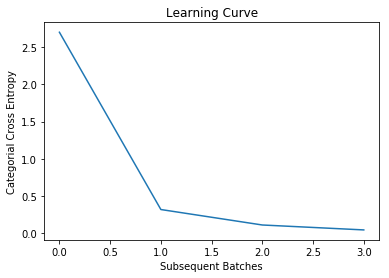

In [42]:
plt.plot(loss_values)
plt.title("Learning Curve")
plt.xlabel('Subsequent Batches')
plt.ylabel('Categorial Cross Entropy')

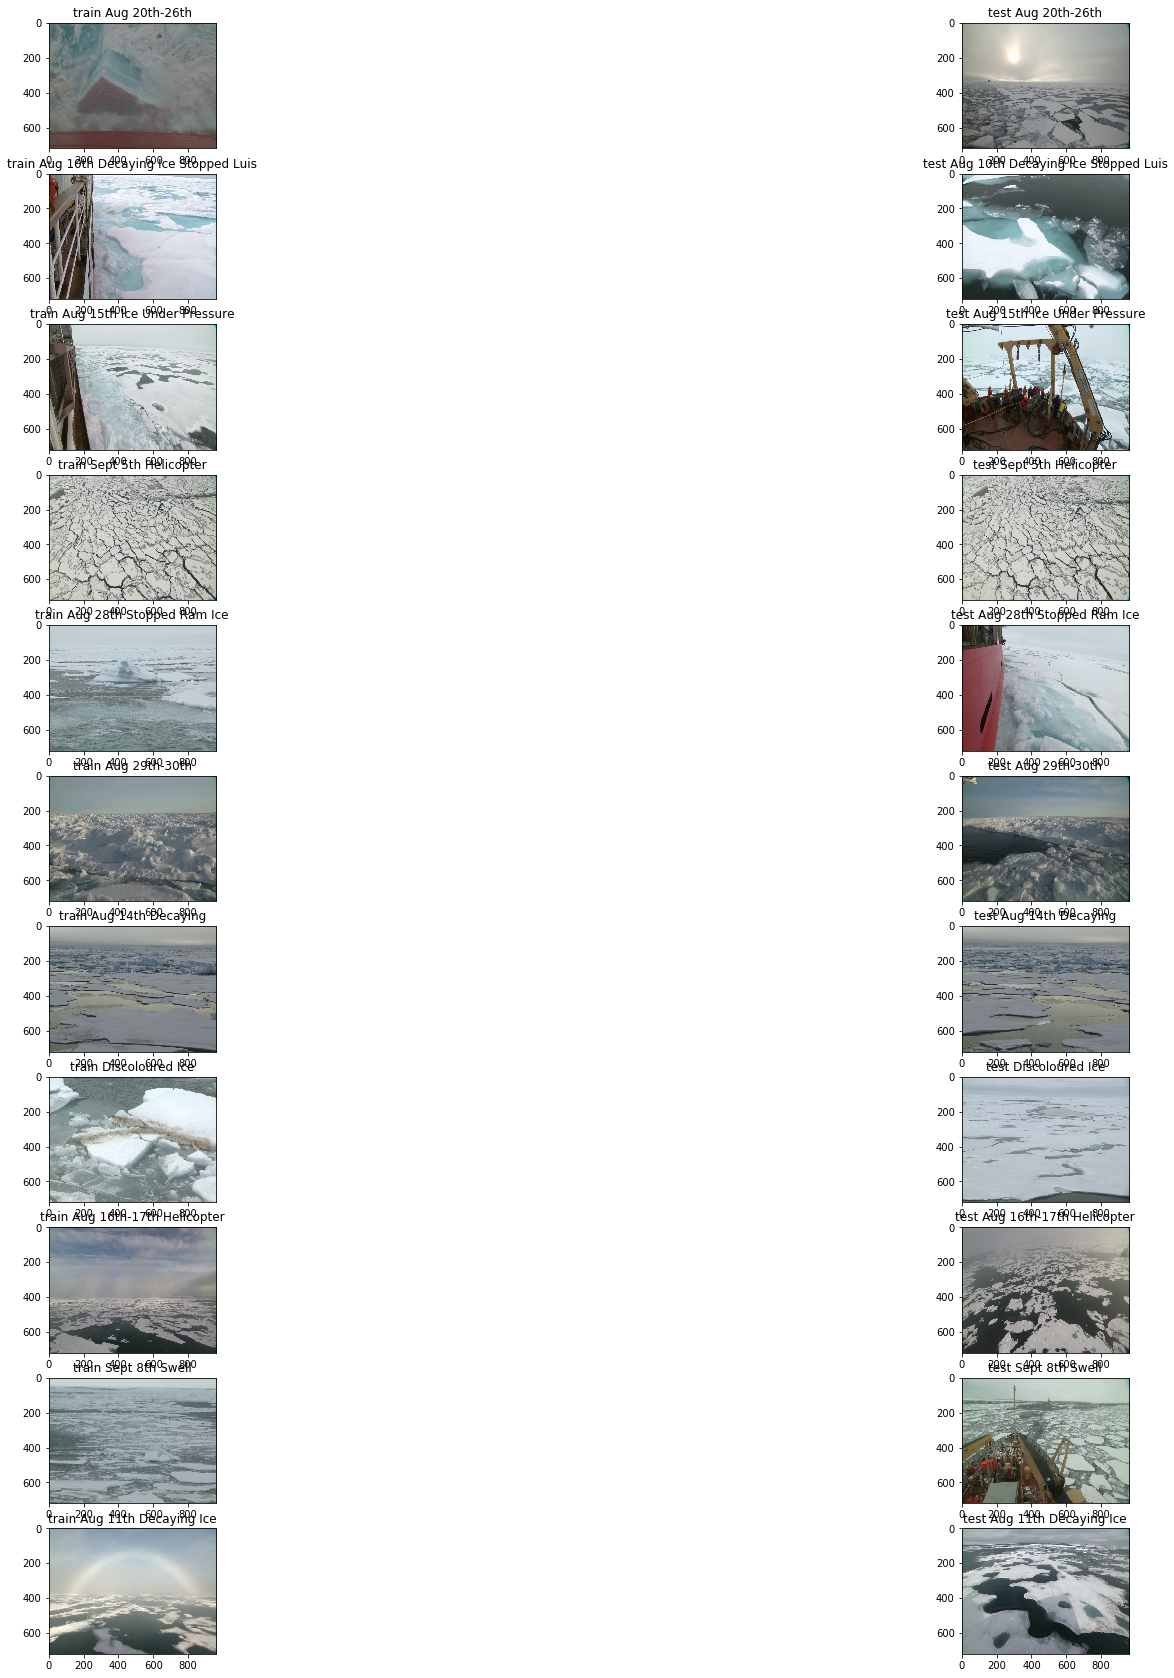

In [32]:
f, axarr = plt.subplots(num_labels,2)
f.set_figheight(30)
f.set_figwidth(30)
for i in range(num_labels):
    axarr[i,0].imshow(mpimg.imread(images_to_show[i][0]))
    axarr[i,0].title.set_text("train "+images_to_show[i][2])
    axarr[i,1].imshow(mpimg.imread(images_to_show[i][1]))
    axarr[i,1].title.set_text("test "+images_to_show[i][2])
plt.show()
plt.savefig('transferlearning.png')
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread(images[0])
# plt.imshow(image)
# plt.show()

In [35]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    from keras import backend as K

    shapes_mem_count = 0
    for l in model.layers:
        single_layer_mem = 1
        for s in l.output_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in set(model.trainable_weights)])
    non_trainable_count = np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])

    total_memory = 4.0*batch_size*(shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3)
    return gbytes

In [36]:
get_model_memory_usage(30,model)

2.156

In [26]:
!nvidia-smi

Wed Jun 27 15:58:06 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.26                 Driver Version: 396.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    73W / 149W |  10955MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  